In [2]:
% cd E:\asgn1
import numpy as np
from __future__ import print_function
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import random

% matplotlib inline
plt.rcParams['figure.figsize']=(10.0,8.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'
%load_ext autoreload
%autoreload 2


E:\asgn1


In [3]:
cifar_dir='cs231n/datasets/cifar-10-batches-py'
x_train,y_train,x_test,y_test=load_CIFAR10(cifar_dir)

print('training data size',x_train.shape)
print('training label size',y_train.shape)
print('test data size',x_test.shape)
print('test label size',y_test.shape)

training data size (50000, 32, 32, 3)
training label size (50000,)
test data size (10000, 32, 32, 3)
test label size (10000,)


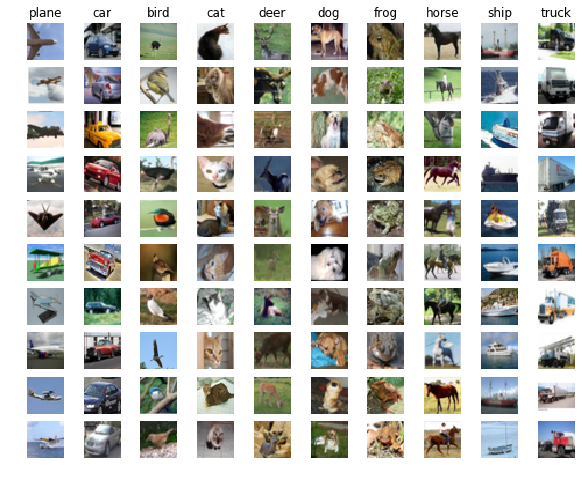

In [4]:
classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes=len(classes)
samples_per_class=10
for y,cls in enumerate(classes):
    idxs=np.flatnonzero(y_train==y)
    idxs=np.random.choice(idxs,samples_per_class,replace=False)
    for i,idx in enumerate(idxs):
        plt_idx=i*num_classes+y+1
        plt.subplot(samples_per_class,num_classes,plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i==0:
            plt.title(cls)
plt.show()

In [5]:
num_training=5000
mask=list(range(num_training))
x_train=x_train[mask]
y_train=y_train[mask]
num_test=500
mask=list(range(num_test))
x_test=x_test[mask]
y_test=y_test[mask]

In [6]:
x_train=np.reshape(x_train,(x_train.shape[0],-1))
x_test=np.reshape(x_test,(x_test.shape[0],-1))
print(x_train.shape,x_test.shape)

(5000, 3072) (500, 3072)


In [7]:
from cs231n.classifiers import KNearestNeighbor
classifier=KNearestNeighbor()
classifier.train(x_train,y_train)

In [8]:
dists=classifier.compute_distances_two_loops(x_test)
print(dists.shape)

(500, 5000)


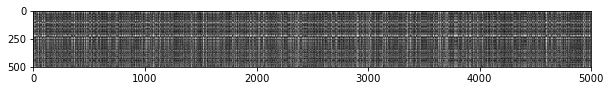

In [9]:
plt.imshow(dists,interpolation='none')
plt.show()

In [10]:
y_test_pred=classifier.predict_labels(dists,k=1)
num_correct=np.sum(y_test_pred==y_test)
accuracy=float(num_correct)/num_test
print("the accuracy is %f and number of correct predictions %d" % (accuracy,num_correct))

the accuracy is 0.274000 and number of correct predictions 137


In [11]:
y_test_pred=classifier.predict_labels(dists,k=5)
num_correct=np.sum(y_test_pred==y_test)
accuracy=float(num_correct)/num_test
print("the accuracy is %f and number of correct predictions %d" % (accuracy,num_correct))

the accuracy is 0.278000 and number of correct predictions 139


In [12]:
dists_one=classifier.compute_distances_one_loop(x_test)
difference=np.linalg.norm(dists-dists_one,ord='fro')
print("difference %f"% difference)
if difference<0.001:
    print("same")
else:
    print("not same")

difference 0.000000
same


In [13]:
dists_two=classifier.compute_distances_no_loops(x_test)
difference=np.linalg.norm(dists-dists_two,ord='fro')
print("difference %f"% difference)
if difference<0.001:
    print("same")
else:
    print("not same")

difference 0.000000
same


In [14]:
def time_function(f,*args):
    import time
    tic=time.time()
    f(*args)
    toc=time.time()
    return toc-tic
two_loop_time = time_function(classifier.compute_distances_two_loops, x_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, x_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, x_test)
print('No loop version took %f seconds' % no_loop_time)

Two loop version took 56.544200 seconds
One loop version took 98.321903 seconds
No loop version took 0.652463 seconds


In [57]:
num_folds=5
k_choices=[1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
k_to_accuracies = {}
x_train_fold=np.array_split(x_train,num_folds)
y_train_fold=np.array_split(y_train,num_folds)
for k in k_choices :
    for i in range(num_folds):
        temp=np.array([])
        train=np.array([])
        test=np.array([])
        for j in range(num_folds):
            if i!=j:
                if temp.shape[0]==0:
                    temp=x_train_fold[j]
                else:
                    temp=np.concatenate((temp,x_train_fold[j]),axis=0)
                if train.shape[0]==0:
                    train=y_train_fold[j]
                else:
                    train=np.concatenate((train,y_train_fold[j]),axis=0)      
        test=x_train_fold[i]
        test.ravel()
        val=y_train_fold[i]
        val.ravel()
        classifier.train(temp,train)
        dists=classifier.compute_distances_no_loops(test)
        y_pred=classifier.predict_labels(dists,k)
        num_correct=np.sum(y_pred==val)
        accuracy=float(num_correct)/num_test
        if k in k_to_accuracies:
            k_to_accuracies[k].append(accuracy)
        else:
            k_to_accuracies[k]=[accuracy]
for k in sorted(k_to_accuracies):
    for acc in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, acc))


k = 1, accuracy = 0.526000
k = 1, accuracy = 0.514000
k = 1, accuracy = 0.528000
k = 1, accuracy = 0.556000
k = 1, accuracy = 0.532000
k = 3, accuracy = 0.478000
k = 3, accuracy = 0.498000
k = 3, accuracy = 0.480000
k = 3, accuracy = 0.532000
k = 3, accuracy = 0.508000
k = 5, accuracy = 0.496000
k = 5, accuracy = 0.532000
k = 5, accuracy = 0.560000
k = 5, accuracy = 0.584000
k = 5, accuracy = 0.560000
k = 8, accuracy = 0.524000
k = 8, accuracy = 0.564000
k = 8, accuracy = 0.546000
k = 8, accuracy = 0.580000
k = 8, accuracy = 0.546000
k = 10, accuracy = 0.530000
k = 10, accuracy = 0.592000
k = 10, accuracy = 0.552000
k = 10, accuracy = 0.568000
k = 10, accuracy = 0.560000
k = 12, accuracy = 0.520000
k = 12, accuracy = 0.590000
k = 12, accuracy = 0.558000
k = 12, accuracy = 0.566000
k = 12, accuracy = 0.560000
k = 15, accuracy = 0.504000
k = 15, accuracy = 0.578000
k = 15, accuracy = 0.556000
k = 15, accuracy = 0.564000
k = 15, accuracy = 0.548000
k = 20, accuracy = 0.540000
k = 20, accu

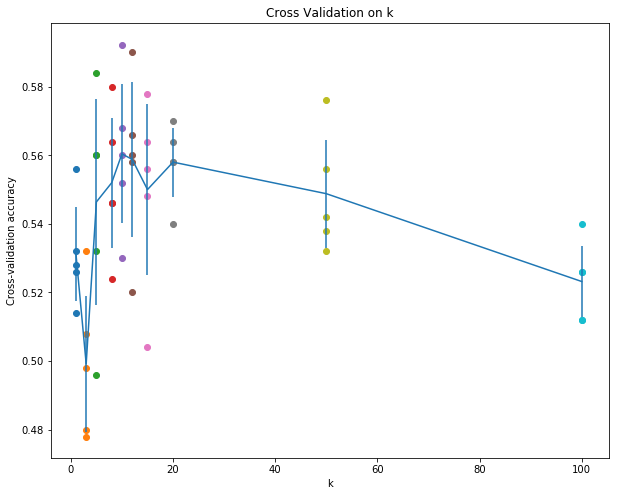

In [59]:
for k in k_choices:
    accuracy=k_to_accuracies[k]
    plt.scatter([k]*len(accuracy),accuracy)
acc_mean=np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
acc_std=np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices,acc_mean,yerr=acc_std)
plt.title('Cross Validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [67]:
best_k = 10

classifier = KNearestNeighbor()
classifier.train(x_train, y_train)
y_test_pred = classifier.predict(x_test,best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 141 / 500 correct => accuracy: 0.282000
